<a href="https://colab.research.google.com/github/Meenaht/SENTIMENT-ANALYSIS-OF-COVID19-PANDEMIC/blob/main/SENTIMENT_ANALYSIS_COVID19_PANDEMIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
nltk.download('sentiwordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('covid19_tweets.csv')

EDA COVID TWEETS

In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
df.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False
179107,TUKY II,"Aliwal North, South Africa",TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...,2018-04-14 17:30:07,97,1697,566,False,2020-08-29 19:44:08,I stop when I see a Stop\n\n@SABCNews\n@Izinda...,NaN,Twitter for Android,False


In [ ]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [ ]:
print('Shape of tweets dataframe : {}'.format(df.shape))

Shape of tweets dataframe : (179108, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


PLOTTING MISSING VALUES

In [ ]:
def calculate_missing_value_percentages(data_frame):
    missing_values = (data_frame.isnull().sum() / len(data_frame)) * 100
    missing_values = missing_values[missing_values > 0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_percentages = calculate_missing_value_percentages(data_frame)
    missing_df = missing_percentages.to_frame()
    missing_df.columns = ['Percentage']
    missing_df.index.names = ['Column']
    missing_df['Column'] = missing_df.index
    sns.set(style='whitegrid', color_codes=True)
    plt.figure(figsize=(6, 8))  # Adjust the figure size as needed
    sns.barplot(x='Column', y='Percentage', data=missing_df)
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.title('Analysis of Missing Values in Dataset')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Ensures proper layout of elements
    plt.show()

# Usage example:
# plot_missing_values(your_dataframe)


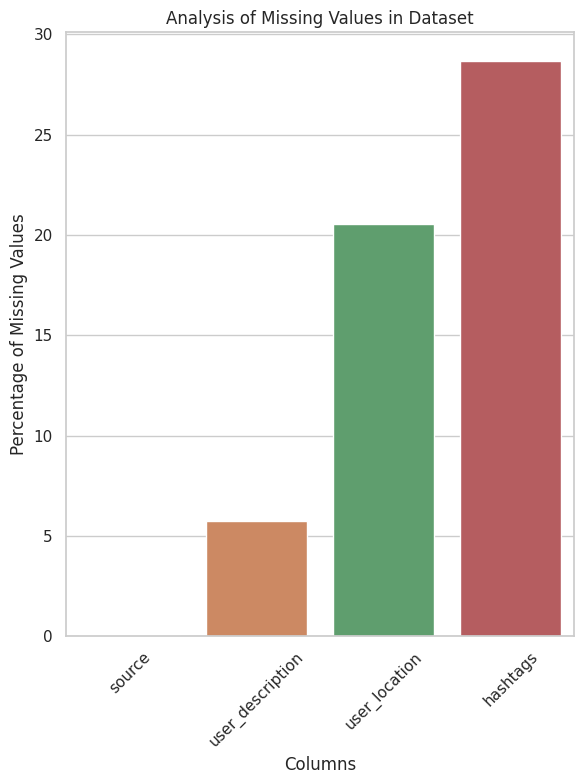

In [ ]:
plot_missing_values(df)

<Axes: >

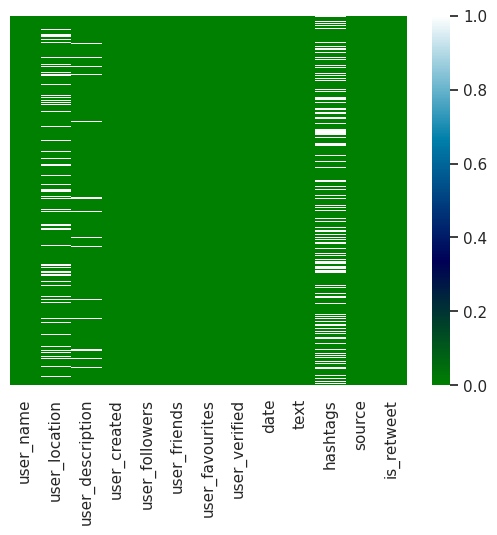

In [ ]:
# heatmap representation of missing values

# plasma,visdir

sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='ocean')

MULTIVARIATE ANALYSIS

PLOTTING UNIQUE VALUES

In [ ]:
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [ ]:
udf = return_unique_values(df)
print(udf)

            Features  Uniques
0          user_name    92276
1      user_location    26920
2   user_description    89200
3       user_created    93708
4     user_followers    27694
5       user_friends    11022
6    user_favourites    35259
7      user_verified        2
8               date   136611
9               text   178683
10          hashtags    52640
11            source      610
12        is_retweet        1


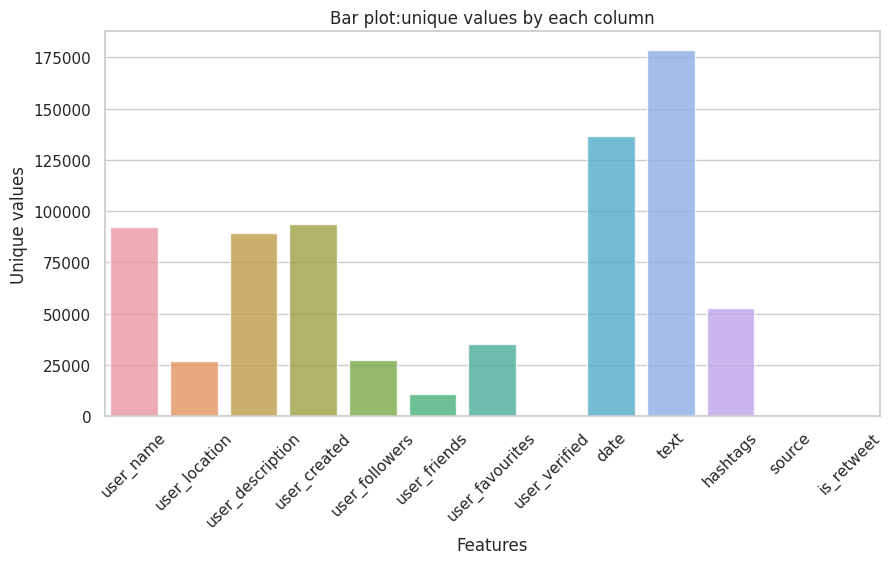

In [ ]:
f, ax = plt.subplots(1,1, figsize=(10,5))#plt.figure(figsize=(10, 5))

sns.barplot(x=udf['Features'], y=udf['Uniques'], alpha=0.8)
plt.title('Bar plot:unique values by each column')
plt.ylabel('Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45)
plt.show()

FREQUENCY OF USERS TWEETING ABOUT CORONA

In [ ]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]

    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

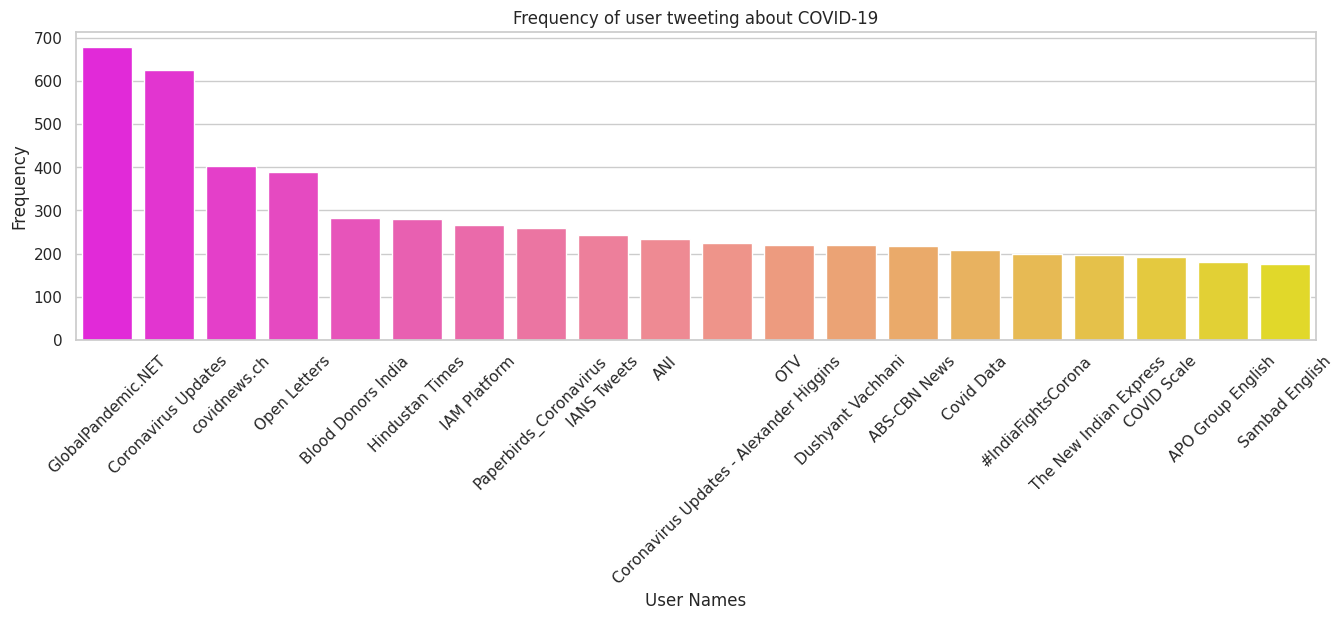

In [ ]:
df.dropna(subset=['user_name'], inplace=True)
f, ax = plt.subplots(1, 1, figsize=(16, 4))
total = float(len(df))
g = sns.countplot(data=df, x='user_name', order=df['user_name'].value_counts().index[:20], palette='spring')
g.set_title("Frequency of user tweeting about COVID-19")
g.set_xlabel("User Names")
g.set_ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

FREQUENCY OF LOCATION TWEETING ABOUT CORONA

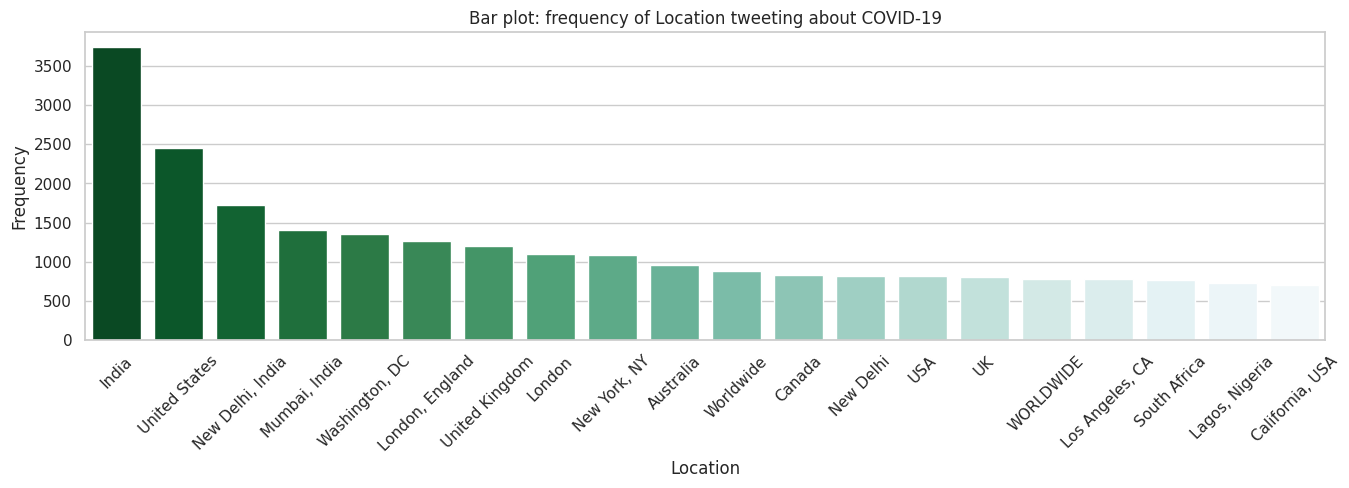

In [ ]:
df.dropna(subset=['user_location'], inplace=True)
f, ax = plt.subplots(1, 1, figsize=(16, 4))
total = float(len(df))
g = sns.countplot(data=df, x='user_location', order=df['user_location'].value_counts().index[:20], palette='BuGn_r')
g.set_title("Bar plot: frequency of Location tweeting about COVID-19")
g.set_xlabel("Location")
g.set_ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

FREQUENCY OF SOURCES TWEETING ABOUT CORONA

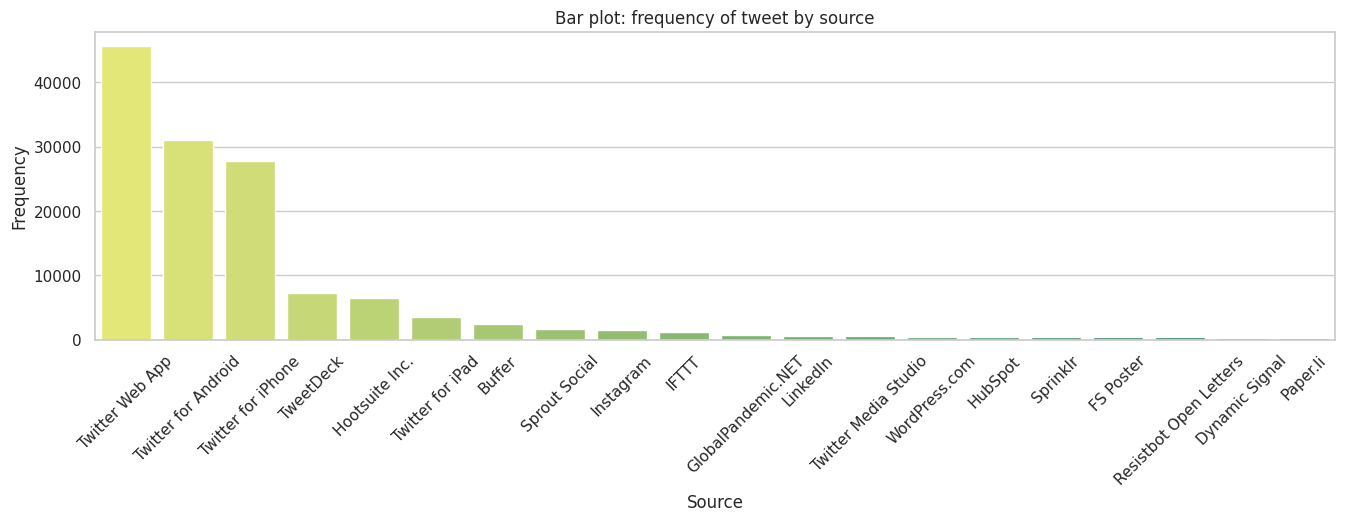

In [ ]:
# Plotting
f, ax = plt.subplots(1, 1, figsize=(16, 4))
total = float(len(df))
g = sns.countplot(data=df, x='source', order=df['source'].value_counts().index[:20], palette='summer_r')
g.set_title("Bar plot: frequency of tweet by source")
g.set_xlabel("Source")
g.set_ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

VIZUALIZING TOP 30 WORDS LOCATION WISE

In [ ]:
from string import punctuation
from nltk.corpus import stopwords
print(stopwords.words('english')[10:15])

def punctuation_stopwords_removal(sms):
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

["you've", "you'll", "you'd", 'your', 'yours']


In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
def draw_bar_graph_for_text_visualization(df, location):
    tweets_from_loc = df.loc[df.user_location==location]
    tweets_from_loc.loc[:, 'text'] = tweets_from_loc['text'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['text'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'count'])
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.barplot(x='word', y='count',
                data=loc_top_30_words, ax=ax)
    plt.title("Top 50 Prevelant Words in {}".format(location))
    plt.xticks(rotation='vertical');

WORD CLOUD FOR TOP 50 PREVALENT WORDS BY LOCATION

In [ ]:
from wordcloud import WordCloud, STOPWORDS
def draw_word_cloud(df, location, title):
    loc_df = df.loc[df.user_location==location]
    loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(loc_df['text']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

<ipython-input-20-8d7cbc5acbb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_from_loc.loc[:, 'text'] = tweets_from_loc['text'].apply(punctuation_stopwords_removal)


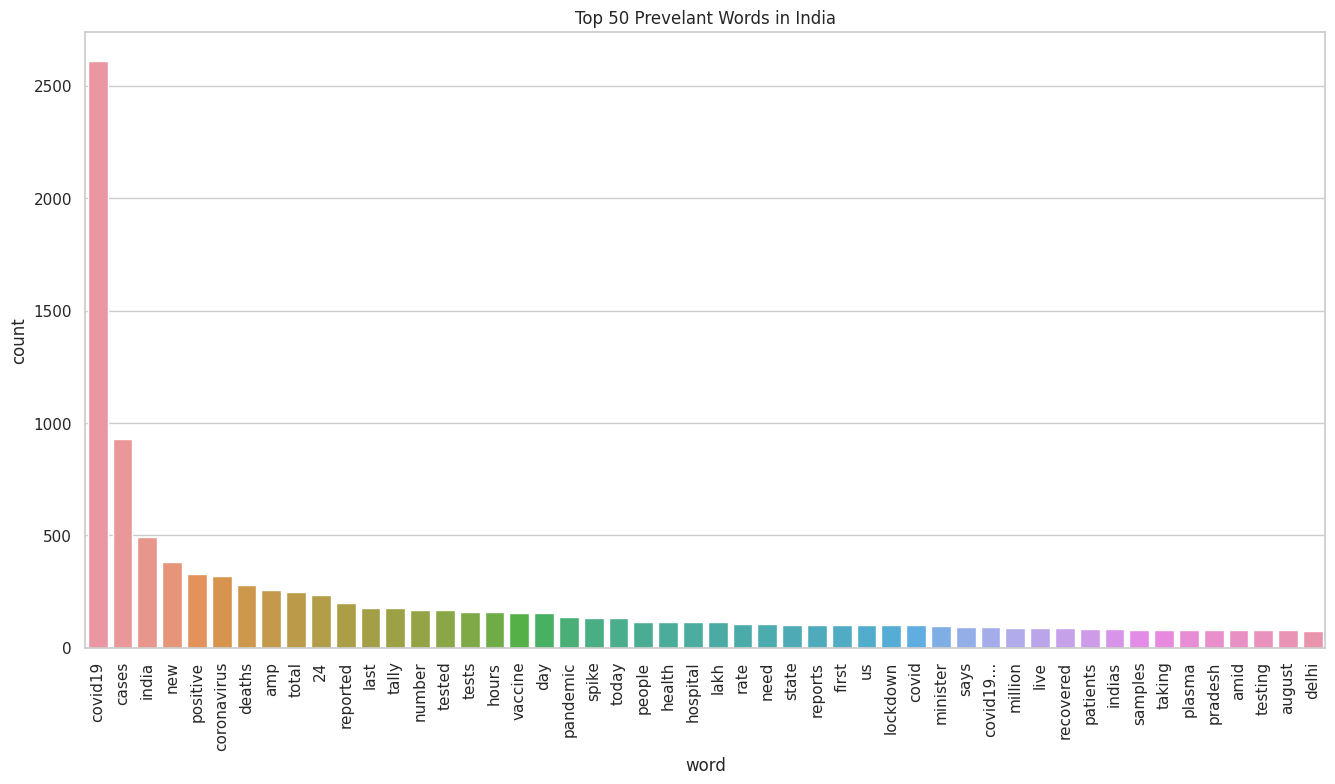

In [ ]:
draw_bar_graph_for_text_visualization(df, 'India')

<ipython-input-21-ce4a094f9a86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)


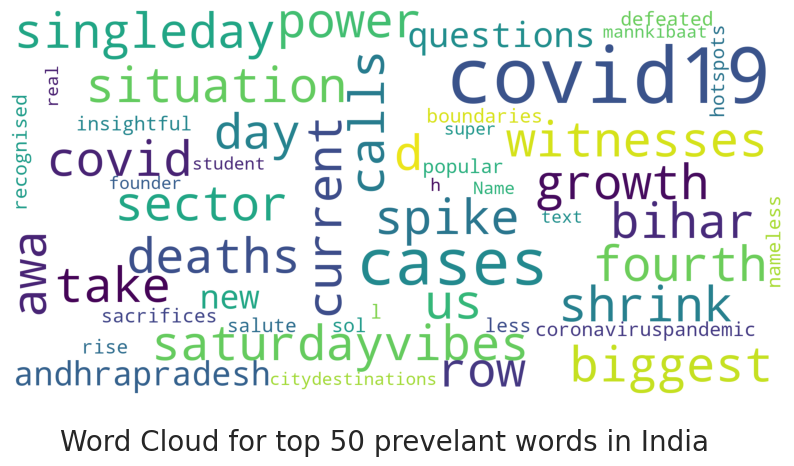

In [ ]:
draw_word_cloud(df, 'India', 'Word Cloud for top 50 prevelant words in India')

<ipython-input-20-8d7cbc5acbb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_from_loc.loc[:, 'text'] = tweets_from_loc['text'].apply(punctuation_stopwords_removal)


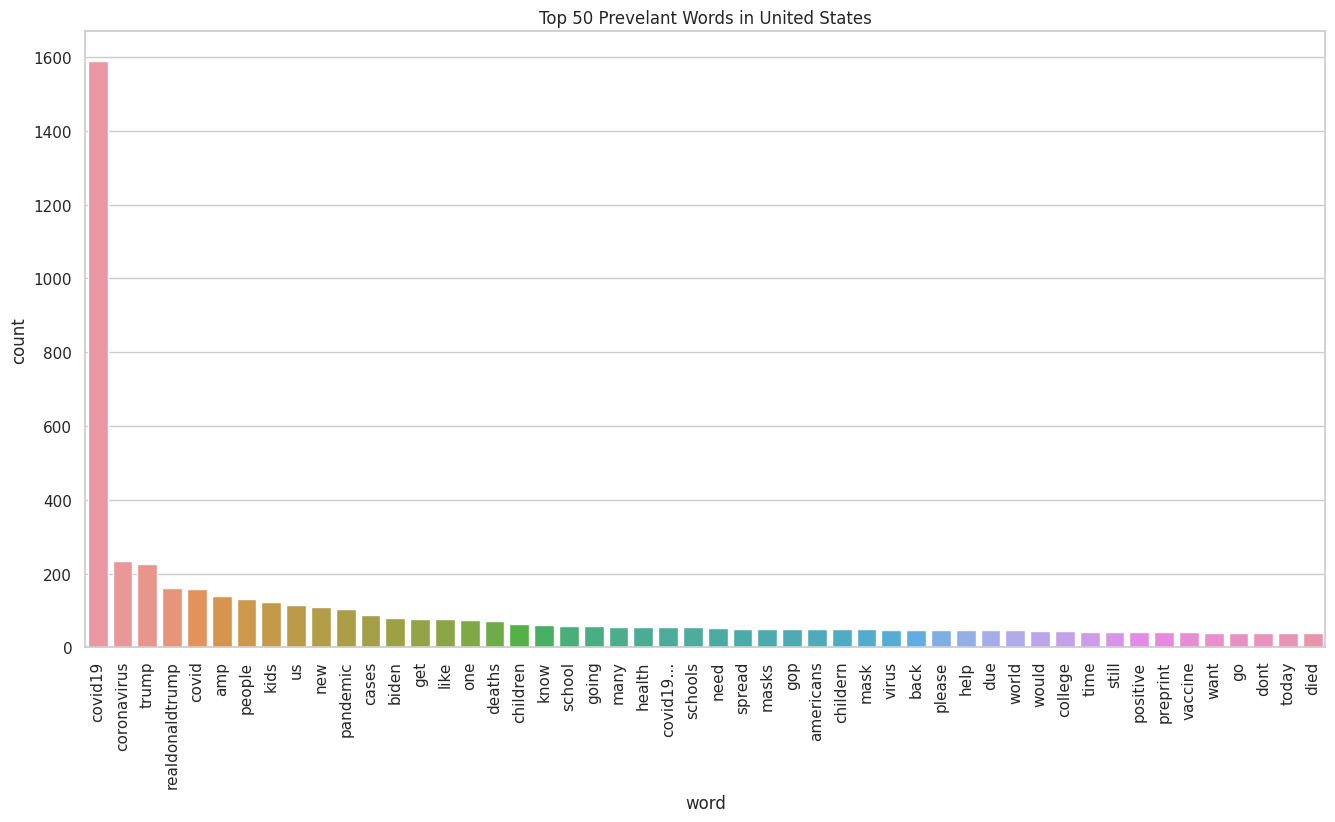

In [ ]:
draw_bar_graph_for_text_visualization(df, 'United States')

<ipython-input-21-ce4a094f9a86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)


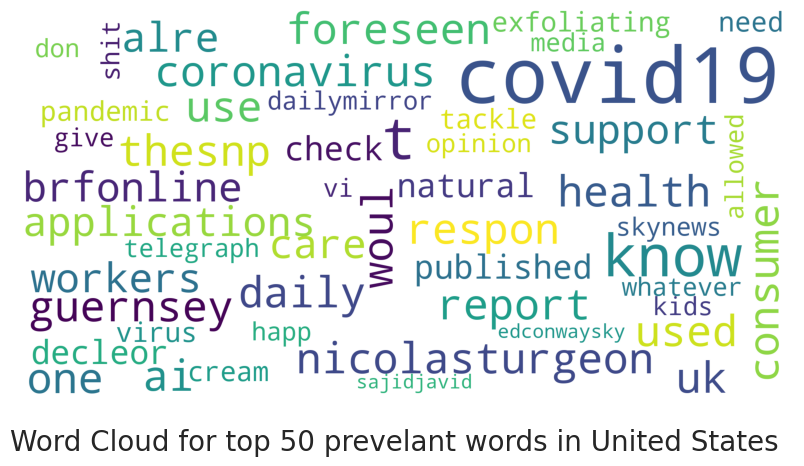

In [ ]:
draw_word_cloud(df, 'United Kingdom', 'Word Cloud for top 50 prevelant words in United States')

<ipython-input-20-8d7cbc5acbb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_from_loc.loc[:, 'text'] = tweets_from_loc['text'].apply(punctuation_stopwords_removal)


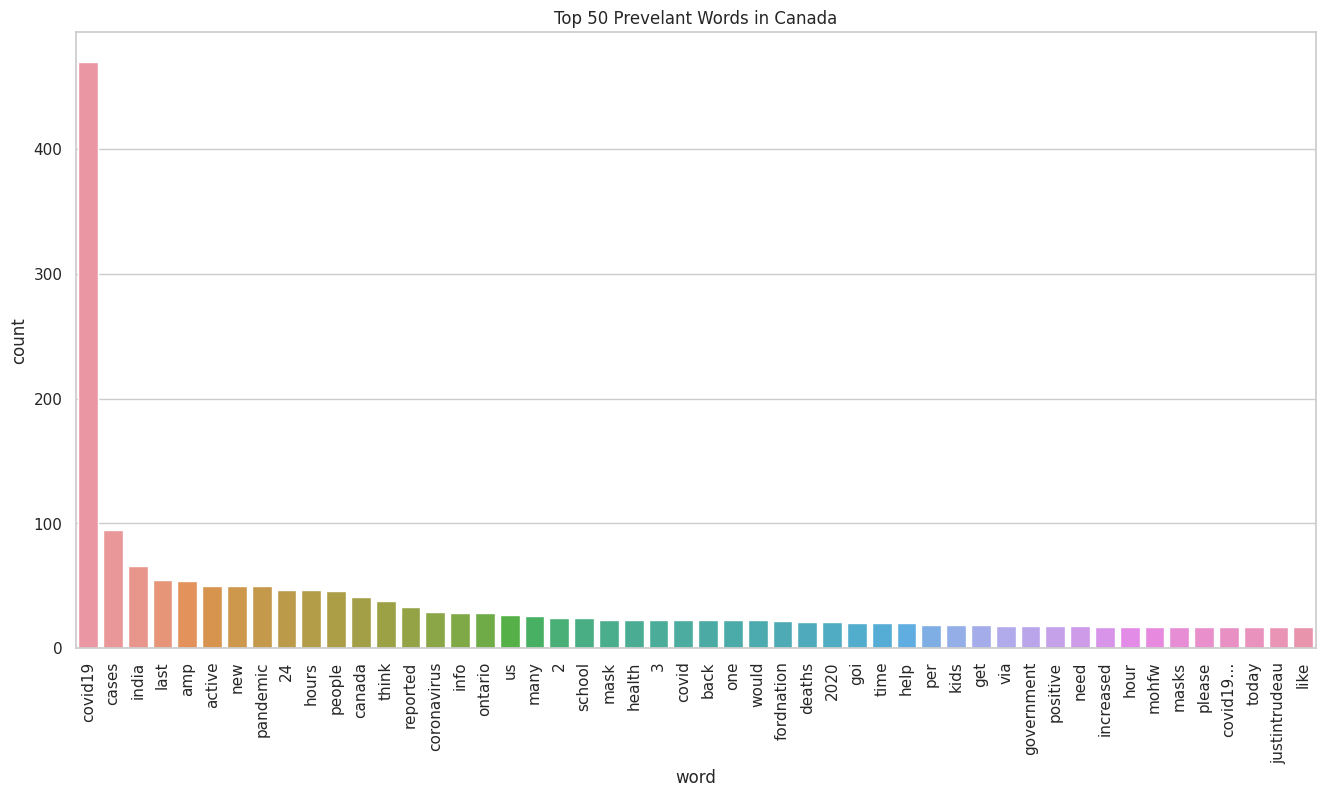

In [ ]:
draw_bar_graph_for_text_visualization(df, 'Canada')

<ipython-input-21-ce4a094f9a86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)


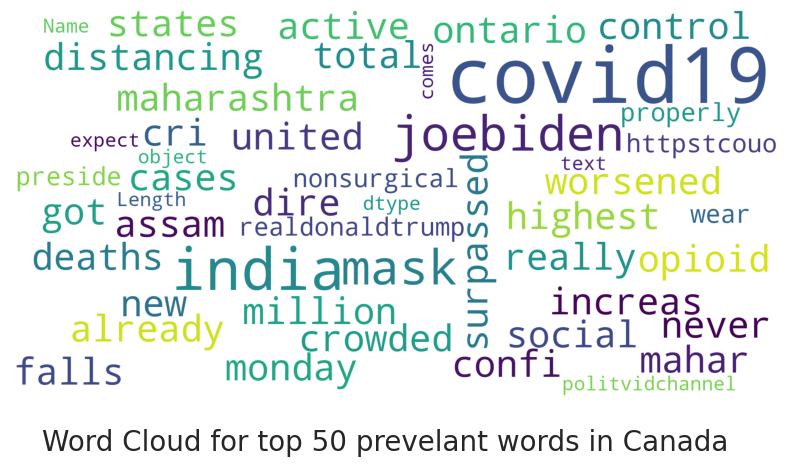

In [ ]:
draw_word_cloud(df, 'Canada', 'Word Cloud for top 50 prevelant words in Canada')

<ipython-input-20-8d7cbc5acbb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_from_loc.loc[:, 'text'] = tweets_from_loc['text'].apply(punctuation_stopwords_removal)


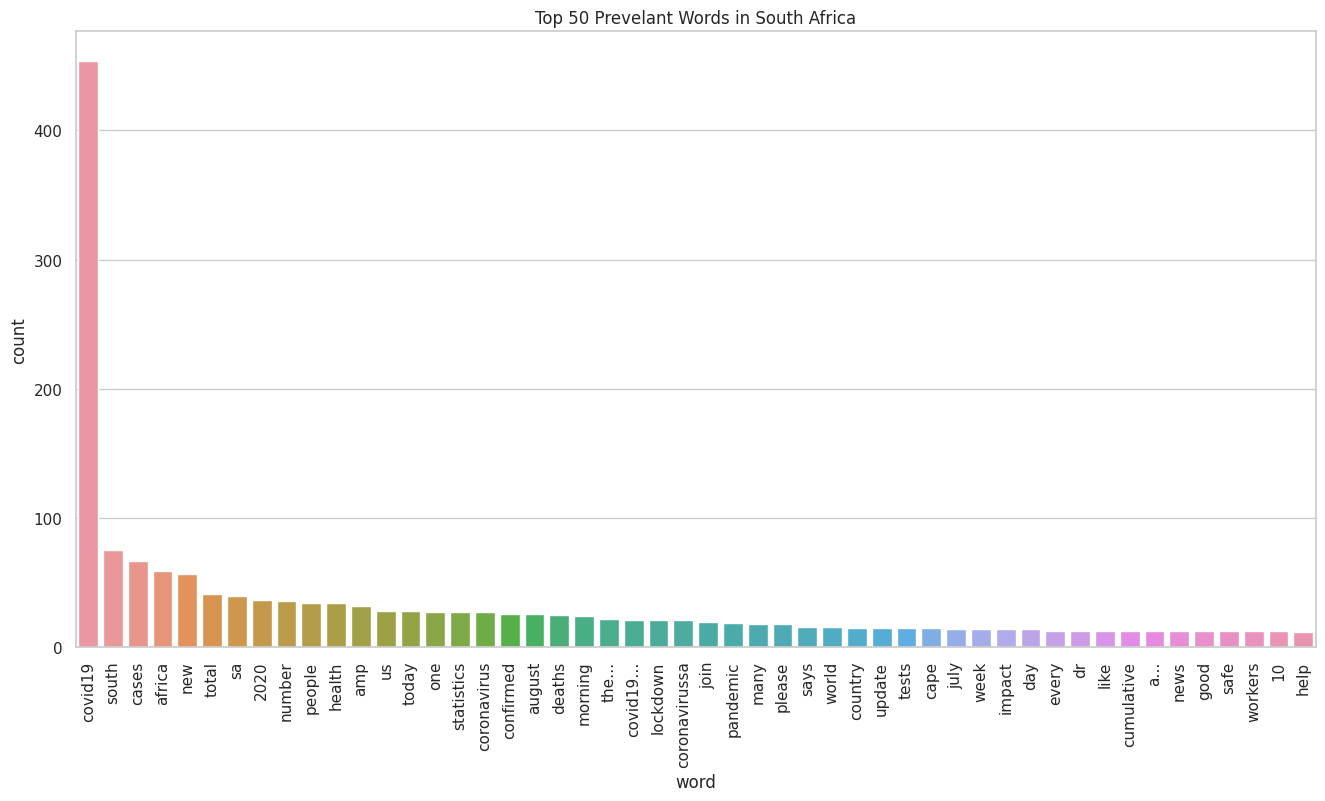

In [ ]:
draw_bar_graph_for_text_visualization(df, 'South Africa')

<ipython-input-21-ce4a094f9a86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)


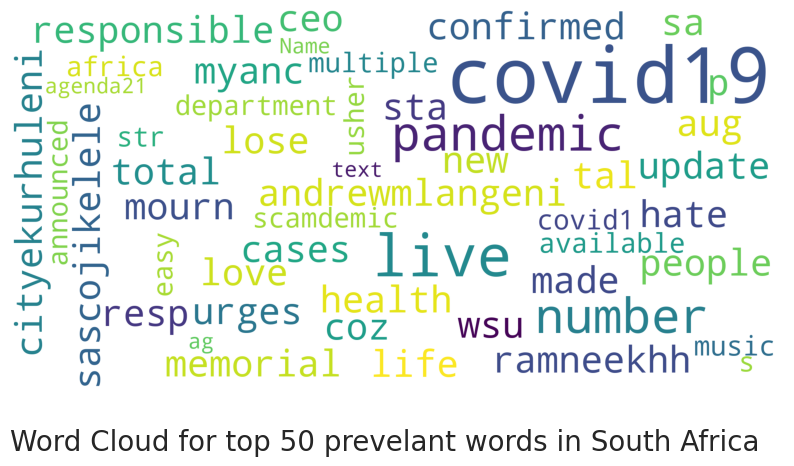

In [ ]:
draw_word_cloud(df, 'South Africa', 'Word Cloud for top 50 prevelant words in South Africa')

<ipython-input-20-8d7cbc5acbb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_from_loc.loc[:, 'text'] = tweets_from_loc['text'].apply(punctuation_stopwords_removal)


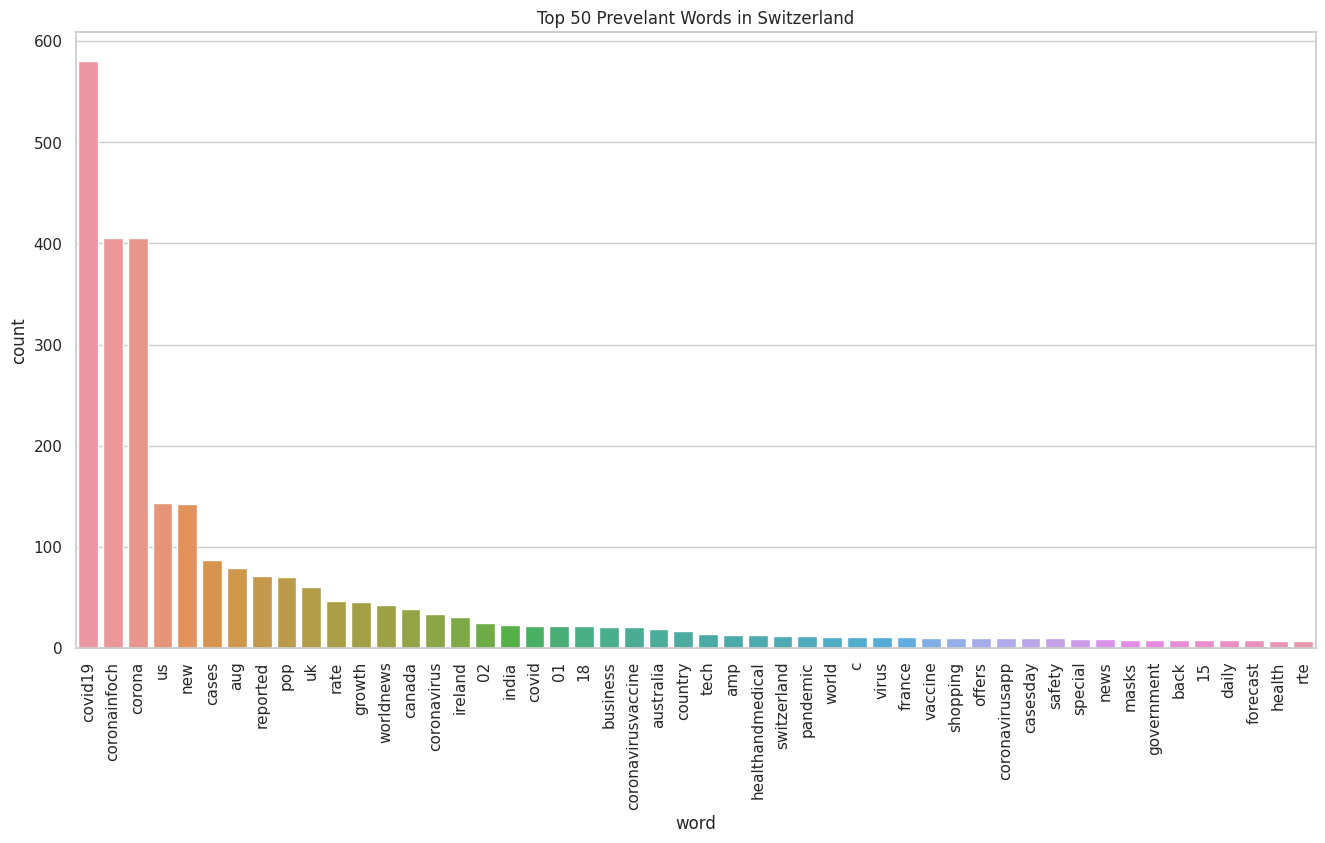

In [ ]:
draw_bar_graph_for_text_visualization(df, 'Switzerland')

<ipython-input-21-ce4a094f9a86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)


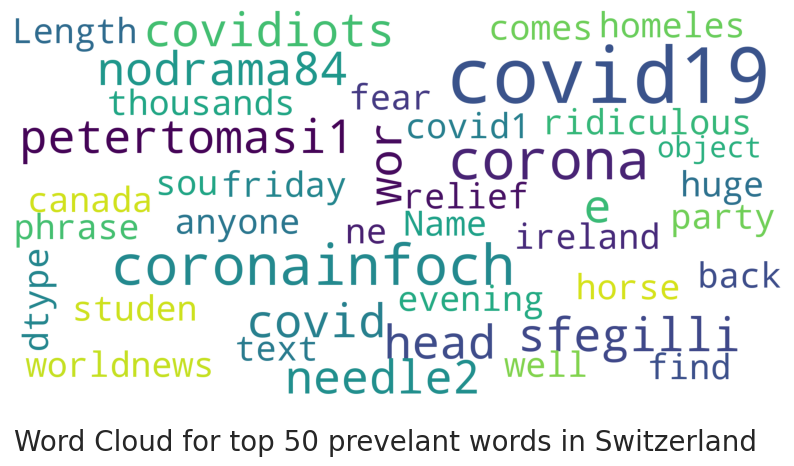

In [ ]:
draw_word_cloud(df, 'Switzerland', 'Word Cloud for top 50 prevelant words in Switzerland')

<ipython-input-20-8d7cbc5acbb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_from_loc.loc[:, 'text'] = tweets_from_loc['text'].apply(punctuation_stopwords_removal)


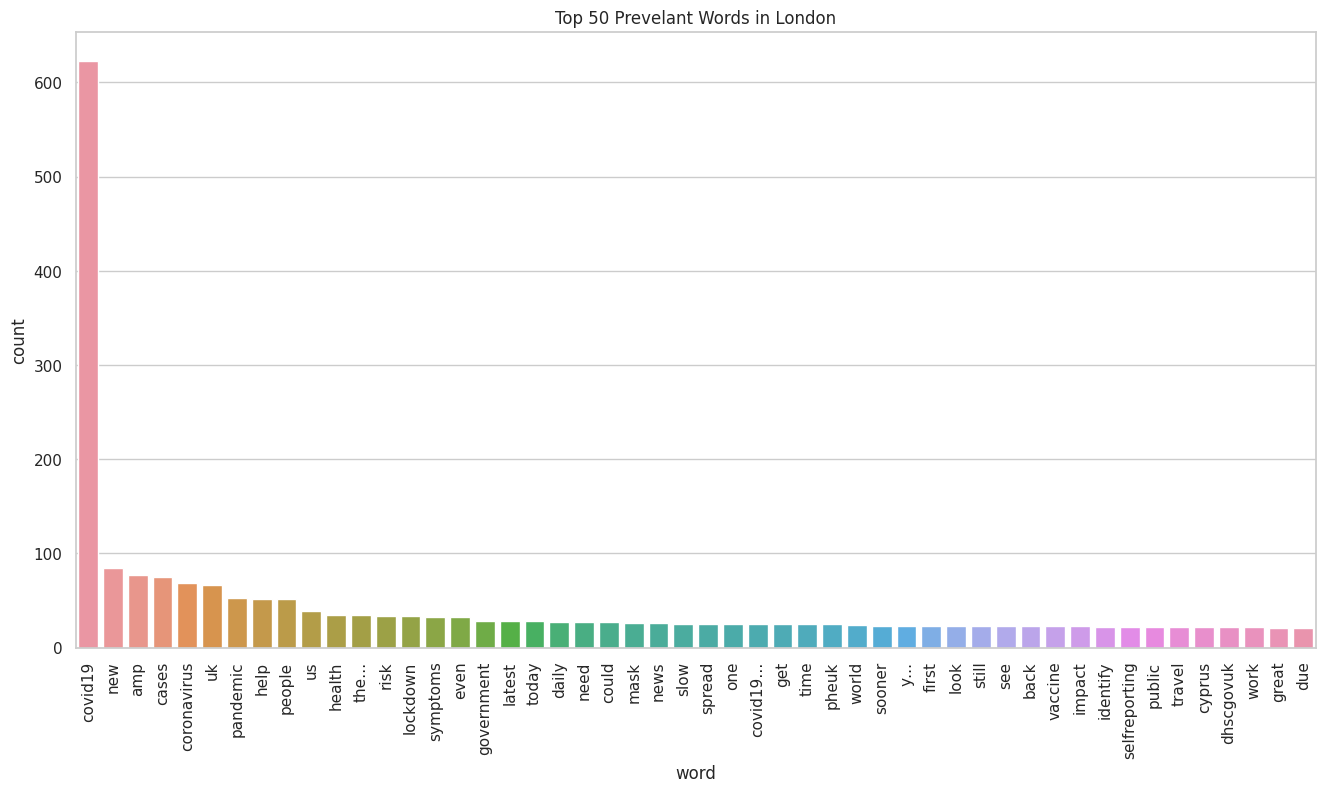

In [ ]:
draw_bar_graph_for_text_visualization(df, 'London')

<ipython-input-21-ce4a094f9a86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)


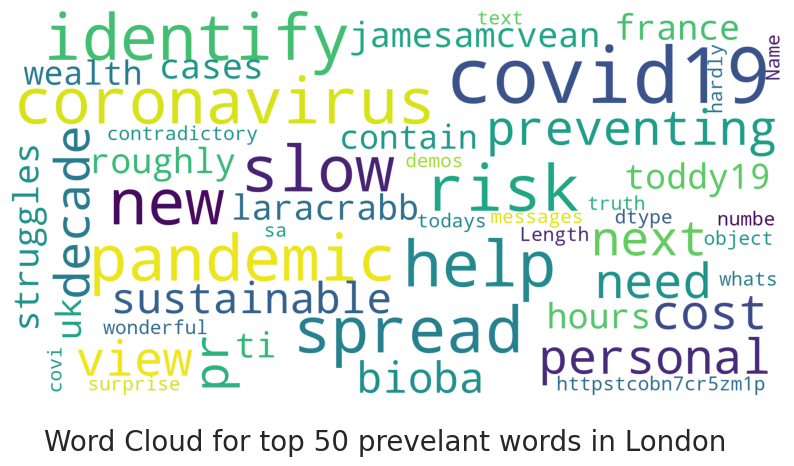

In [ ]:
draw_word_cloud(df, 'London', 'Word Cloud for top 50 prevelant words in London')

MISSING VALUES(HANDLING)

In [ ]:
df['user_location'].fillna('undisclosed_location', inplace=True)
df['hashtags'].fillna('unknown_hashtags', inplace=True)
df['source'].fillna('unknown_sources', inplace=True)

NOISE REMOVAL FOR TEXTUAL DATA

CONVERSION TO LOWER CASE

In [ ]:
df['text'] = df['text'].str.lower()
df['text'][10:20]

13    let's all protect ourselves from #covid19.\nit...
14    rajasthan government today started a plasma ba...
15    nagaland police on covid-19 awareness at city ...
17    second wave of #covid19 in flanders..back to m...
19    covid update: the infection rate in florida is...
21    coronavirus - south africa: covid-19 update fo...
22    @jimbnntt your image doesn't list a source, bu...
23    the first comprehensive review of #wash &amp; ...
24    holy water in times of #covid19 https://t.co/y...
25    #kolar\nneed #blood type :  b-positive\nat : j...
Name: text, dtype: object

REMOVING URL

In [ ]:
def remove_urls(text):
    url_pattern = r"http[s]?://\S+|www\.\S+"
    text_without_urls = re.sub(url_pattern, '', text)
    return text_without_urls
df['cleaned_text'] = df['text'].apply(lambda text: remove_urls(text))

REMOVING PUNCTUATION

In [ ]:
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Apply the remove_punctuation function to the 'text' column
df['cleaned_text'] = df['text'].apply(remove_punctuation)

REMOVING STOPWORDS

In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
# Apply the remove_stopwords function to the 'cleaned_text' column
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

REMOVING SPECIAL CHARACTERS

In [ ]:
# Function to remove special characters from a text column
def remove_special_characters(text):
    # Use regex to replace non-alphanumeric characters with space
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_special_characters)


NOISE REMOVAL FOR LOCATION

REMOVING URL

In [ ]:
# Define a regular expression pattern for URLs
url_pattern = r'[^a-zA-Z0-9\s]'

# Apply regex to remove URLs from 'location' column
df['location'] = df['user_location'].replace(url_pattern, '', regex=True)

REMOVING STOPWORDS

In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'cleaned_text' column
df['location'] = df['location'].apply(remove_stopwords)
df["location"]

0                        astroworld
1                       New York NY
2                   Pewee Valley KY
3                      Stuck Middle
4                     Jammu Kashmir
                    ...            
179103               Ilorin Nigeria
179104                      Ontario
179105                       Canada
179106                New York City
179107    Aliwal North South Africa
Name: location, Length: 142337, dtype: object

REMOVING PUNCTUATION

In [ ]:
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)
df['location'] = df['location'].apply(remove_punctuation)
df['location'][5677]

'Bangalore India'

REMOVING SPECIAL CHARACTERS

In [ ]:
# Function to remove special characters from a text column
def remove_special_characters(text):
    # Use regex to replace non-alphanumeric characters with space
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the 'text' column
df['location'] = df['location'].apply(remove_special_characters)


In [ ]:
df['location'][5677]

'Bangalore India'

LEMMATIZATION

In [ ]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def filtered_text(text):
    tokens = word_tokenize(text)
    filtered_text = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    return ' '.join(filtered_text)

df['filtered_text'] = df['cleaned_text'].apply(filtered_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['filtered_text']

0         smell scent hand sanitizers today someone past...
1         hey yankee yankeespr mlb wouldnt make sense pl...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv one gift covid19 give appreciation...
4         25 july medium bulletin novel coronavirusupdat...
                                ...                        
179103    thanks iamohmai nominate wearamask challenge n...
179104    2020 year insanity lol covid19 httpstcoy48np0yzgn
179105    ctvnews powerful painting juan lucena tribute ...
179106    1200 student test positive covid19 major unive...
179107    stop see stop sabcnews izindabanews24 dailysun...
Name: filtered_text, Length: 142337, dtype: object

In [ ]:
df['filtered_text']

0         smell scent hand sanitizers today someone past...
1         hey yankee yankeespr mlb wouldnt make sense pl...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv one gift covid19 give appreciation...
4         25 july medium bulletin novel coronavirusupdat...
                                ...                        
179103    thanks iamohmai nominate wearamask challenge n...
179104    2020 year insanity lol covid19 httpstcoy48np0yzgn
179105    ctvnews powerful painting juan lucena tribute ...
179106    1200 student test positive covid19 major unive...
179107    stop see stop sabcnews izindabanews24 dailysun...
Name: filtered_text, Length: 142337, dtype: object

CONVERSION (DATE TO STRING FORMAT)

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.strftime("%A")
df['month'] = df['date'].dt.strftime("%B")
df['year'] = df['date'].dt.year

SENTIMENT ANALYSIS

LEXICON BASED APPROACH (USING VADER)

VADER APPLICATION ON TEXTUAL DATA

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores["compound"]

    if compound_score > 0.05:
        return "Positive"
    elif compound_score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_vader"] = df["filtered_text"].apply(get_sentiment)
print(df)

                     user_name               user_location  \
0                       ᏉᎥ☻լꂅϮ                  astroworld   
1                Tom Basile 🇺🇸                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ⏳                   🇨🇦 Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  \
0       wednesday addams as a disney princess keepin i...   
1       Husband, Father, Columnist & Commentator. Auth...   
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Br

LEXICON BASED APPROACH (USING SENTIWORDNET)

In [ ]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
def get_sentiment_score(word, pos):
    synsets = list(swn.senti_synsets(word, pos))
    if synsets:
        pos_score = sum([synset.pos_score() for synset in synsets])
        neg_score = sum([synset.neg_score() for synset in synsets])
        return pos_score - neg_score
    else:
        return 0
def get_sentiment(text):
    sentiment_score = 0
    tokens = nltk.word_tokenize(text)
    for token in tokens:
        pos = None
        if 'NN' in nltk.pos_tag([token])[0][1]:
            pos = wn.NOUN
        elif 'VB' in nltk.pos_tag([token])[0][1]:
            pos = wn.VERB
        elif 'JJ' in nltk.pos_tag([token])[0][1]:
            pos = wn.ADJ
        elif 'RB' in nltk.pos_tag([token])[0][1]:
            pos = wn.ADV
        if pos:
            sentiment_score += get_sentiment_score(token, pos)
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"
df['sentiment_net'] = df['filtered_text'].apply(get_sentiment)
print(df)

                     user_name               user_location  \
0                       ᏉᎥ☻լꂅϮ                  astroworld   
1                Tom Basile 🇺🇸                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ⏳                   🇨🇦 Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  \
0       wednesday addams as a disney princess keepin i...   
1       Husband, Father, Columnist & Commentator. Auth...   
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Br

In [ ]:
def get_sentiment_score(word):
    synsets = list(swn.senti_synsets(word))
    if synsets:
        # Calculate sentiment scores for positive and negative sentiment
        pos_score = sum([synset.pos_score() for synset in synsets])
        neg_score = sum([synset.neg_score() for synset in synsets])
        return pos_score - neg_score
    else:
        return 0

def get_sentiment(text):
    tokens = filtered_text(text)
    sentiment_scores = [get_sentiment_score(token) for token in tokens]
    overall_sentiment_score = sum(sentiment_scores)

    if overall_sentiment_score > 0:
        return "Positive"
    elif overall_sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_swn"] = df["filtered_text"].apply(get_sentiment)
print(df)

                     user_name               user_location  \
0                       ᏉᎥ☻լꂅϮ                  astroworld   
1                Tom Basile 🇺🇸                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ⏳                   🇨🇦 Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  \
0       wednesday addams as a disney princess keepin i...   
1       Husband, Father, Columnist & Commentator. Auth...   
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Br

GRAPH OF SENTIMENT DISTRIBUTION

DISTRIBUTION OF SENTIMENT BY MONTH(VADER)

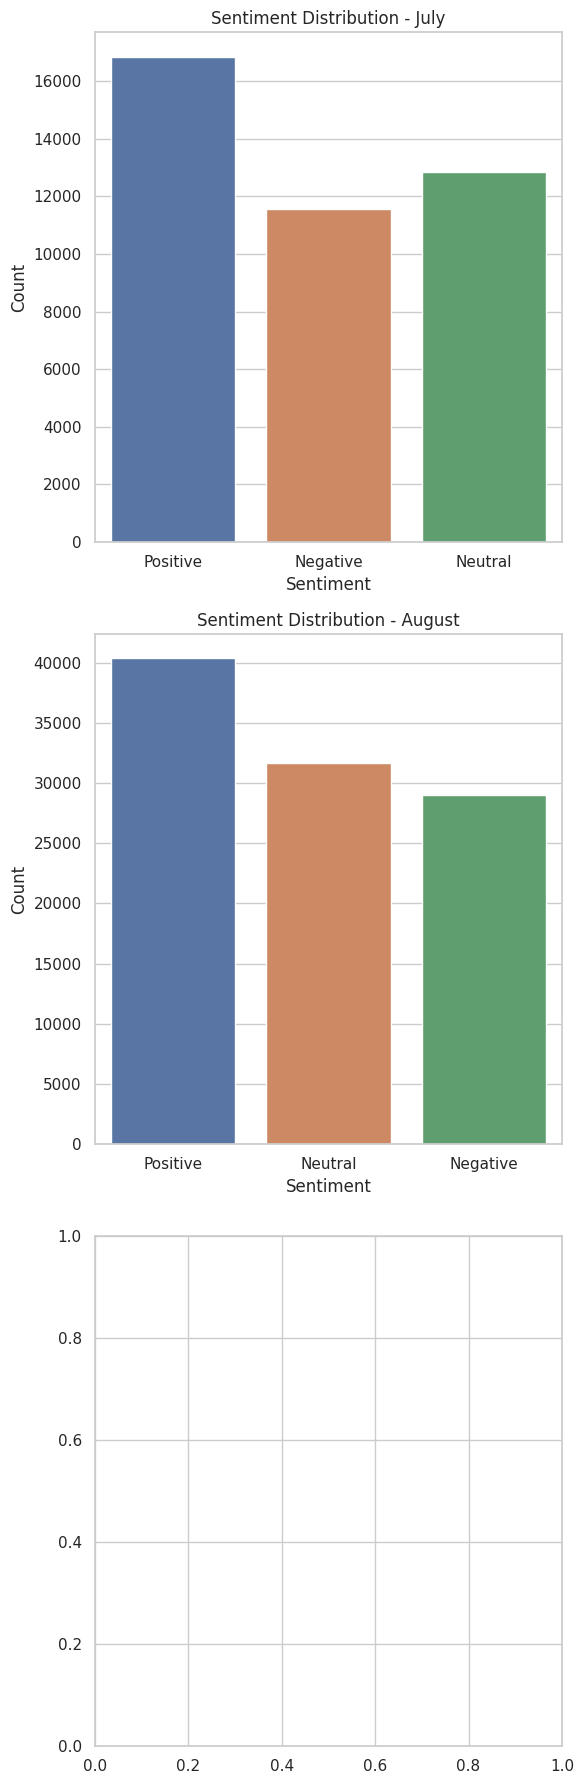

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 18))

# Loop through each month and create a countplot for sentiment
months = df['month'].unique()
for i, month in enumerate(months):
    ax = axes[i]
    month_data = df[df['month'] == month]
    sns.countplot(x="sentiment_vader", data=month_data, ax=ax)
    ax.set_title(f"Sentiment Distribution - {month}")
    ax.set_xlabel("Sentiment")
    ax.set_ylabel("Count")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

DISTRIBUTION OF SENTIMENT BY MONTH(SENTIWORDNET)

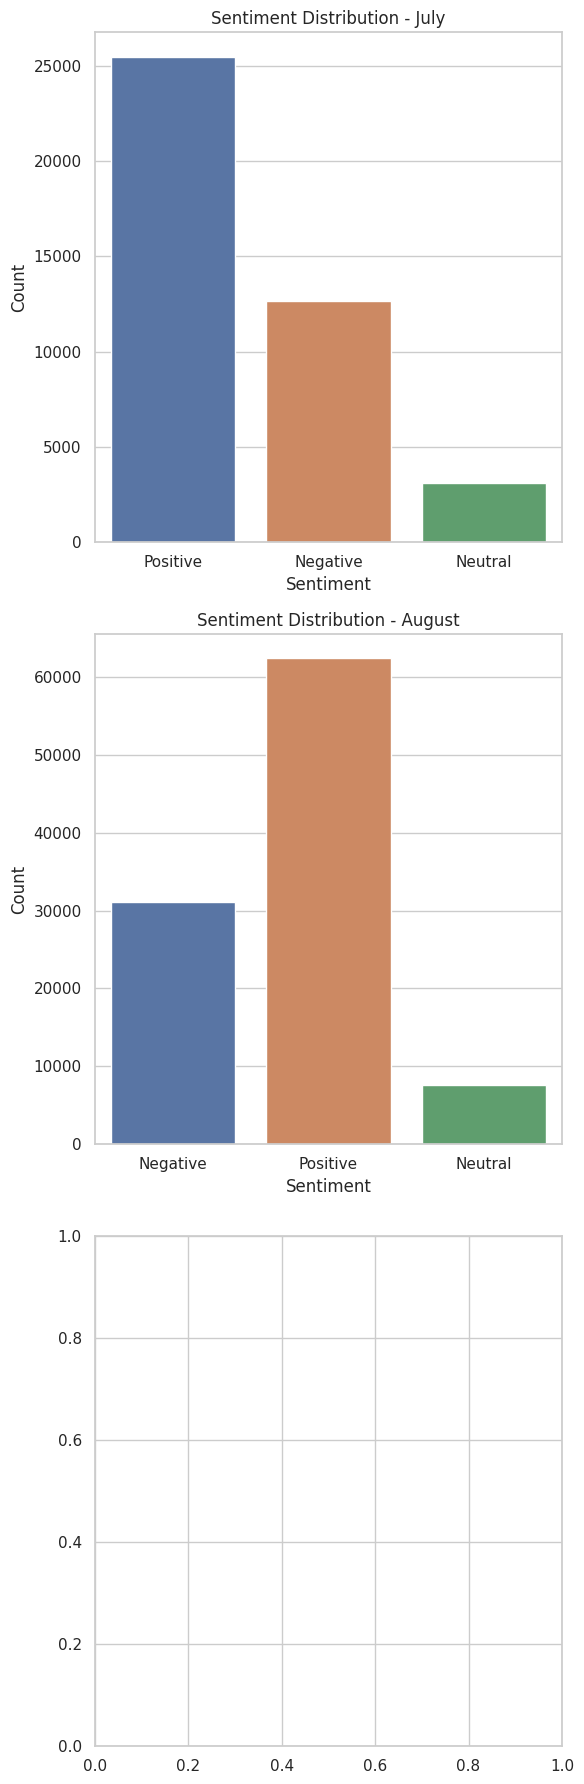

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 18))

# Loop through each month and create a countplot for sentiment
months = df['month'].unique()
for i, month in enumerate(months):
    ax = axes[i]
    month_data = df[df['month'] == month]
    sns.countplot(x="sentiment_net", data=month_data, ax=ax)
    ax.set_title(f"Sentiment Distribution - {month}")
    ax.set_xlabel("Sentiment")
    ax.set_ylabel("Count")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

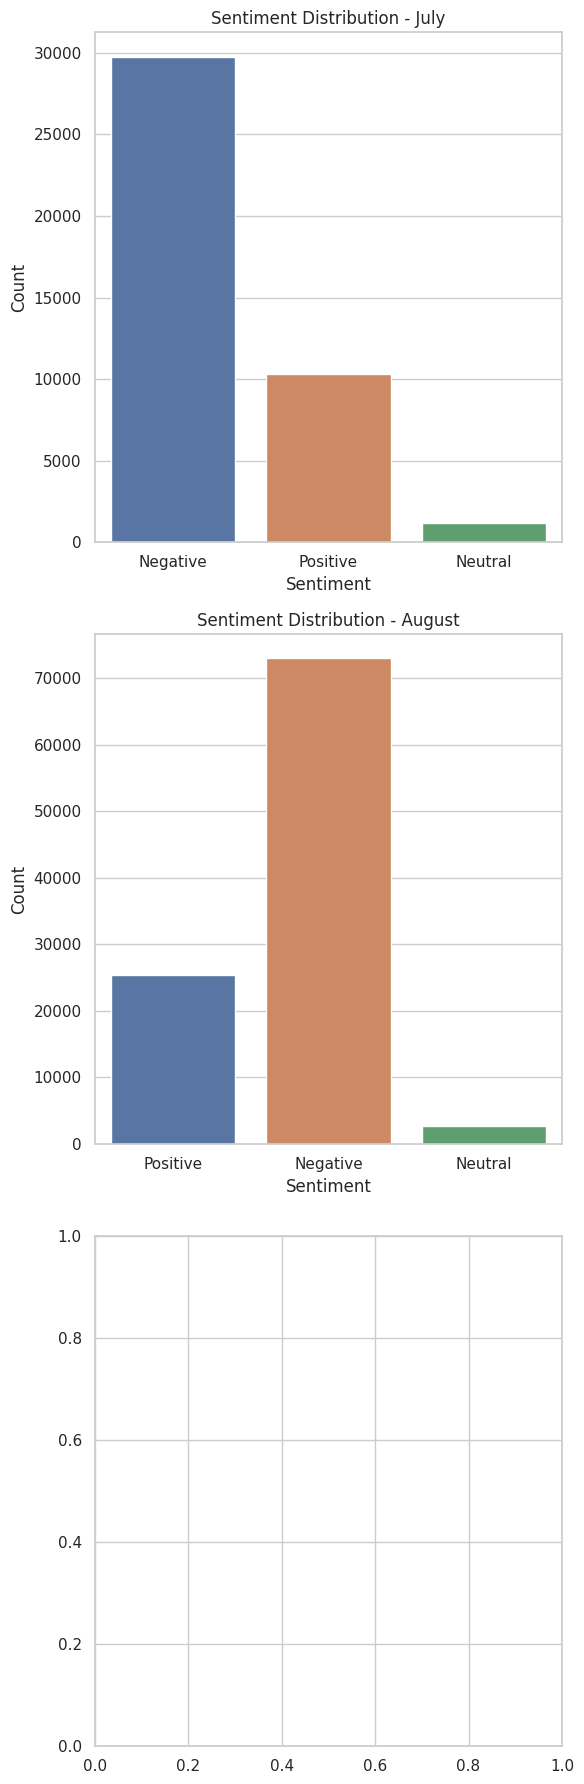

In [ ]:
# Assuming df_sent contains your DataFrame with sentiment data

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 18))

# Loop through each month and create a countplot for sentiment
months = df['month'].unique()
for i, month in enumerate(months):
    ax = axes[i]
    month_data = df[df['month'] == month]
    sns.countplot(x="sentiment_swn", data=month_data, ax=ax)
    ax.set_title(f"Sentiment Distribution - {month}")
    ax.set_xlabel("Sentiment")
    ax.set_ylabel("Count")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

DISTRIBUTION OF ENTIRE SENTIMENT(VADER)

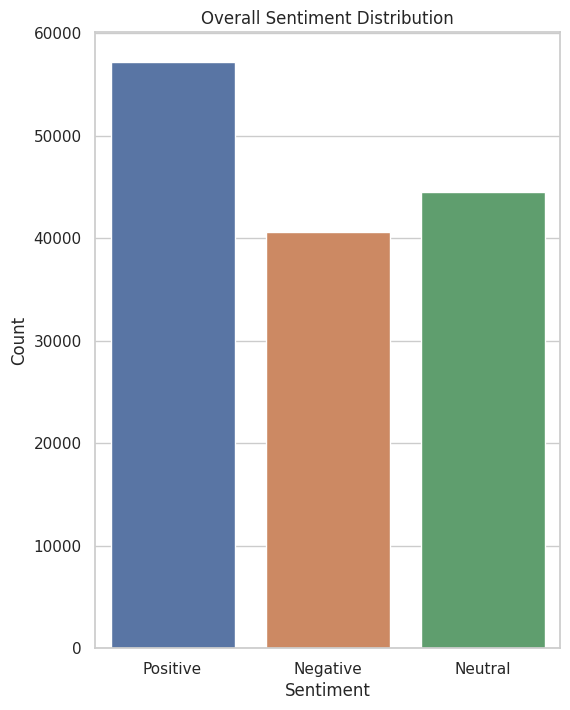

In [ ]:
fig = plt.figure(figsize=(6,8))
sns.countplot(x="sentiment_vader", data=df)

# Customize plot labels, title, etc.
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.show()

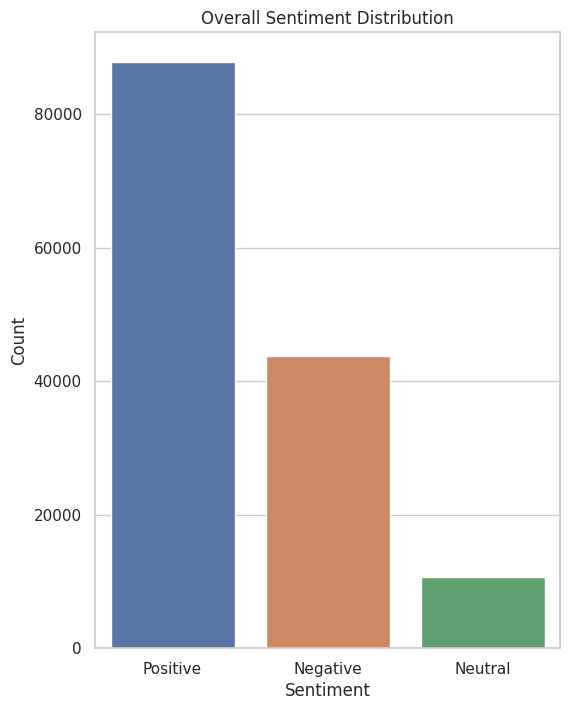

In [ ]:
fig = plt.figure(figsize=(6,8))
sns.countplot(x="sentiment_net", data=df)

# Customize plot labels, title, etc.
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.show()

DISTRIBUTION OF ENTIRE SENTIMENT(SENTIWORDNET)

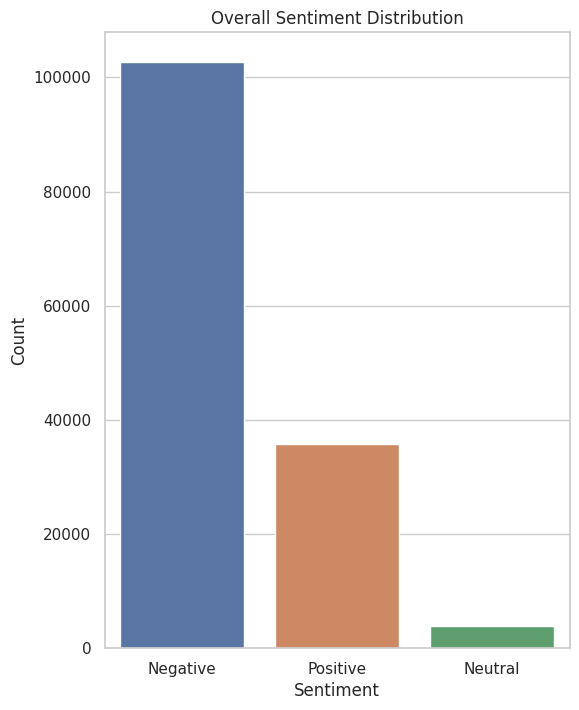

In [ ]:
fig = plt.figure(figsize=(6,8))
sns.countplot(x="sentiment_swn", data=df)

# Customize plot labels, title, etc.
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.show()

PIE CHART DISTRIBUTION(VADER)

Text(0.5, 1.0, 'Overall Sentiment Distribution')

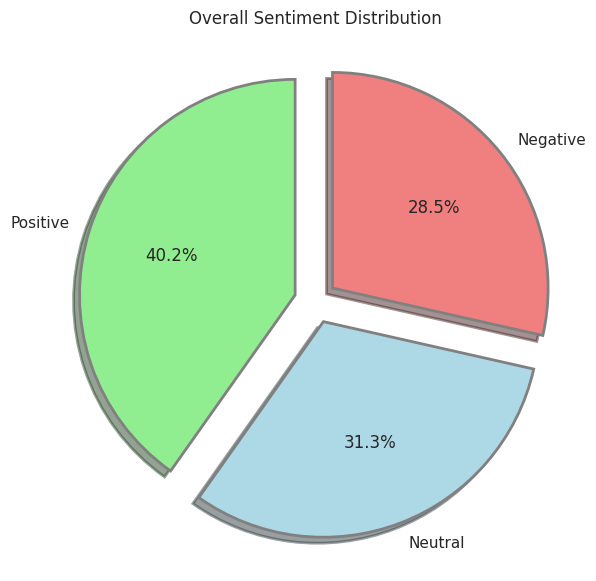

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("lightgreen", "lightblue", "lightcoral")
wp = {'linewidth':2, 'edgecolor':"grey"}
tags = df['sentiment_vader'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Overall Sentiment Distribution')

PIE CHART DISTRIBUTION(SENTIWORDNET)

Text(0.5, 1.0, 'Overall Sentiment Distribution')

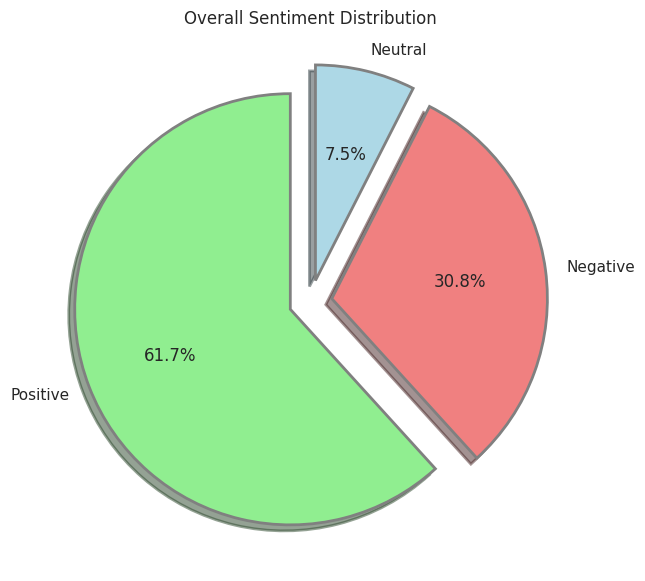

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("lightgreen", "lightcoral", "lightblue")
wp = {'linewidth':2, 'edgecolor':"grey"}
tags = df['sentiment_net'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Overall Sentiment Distribution')

Text(0.5, 1.0, 'Overall Sentiment Distribution')

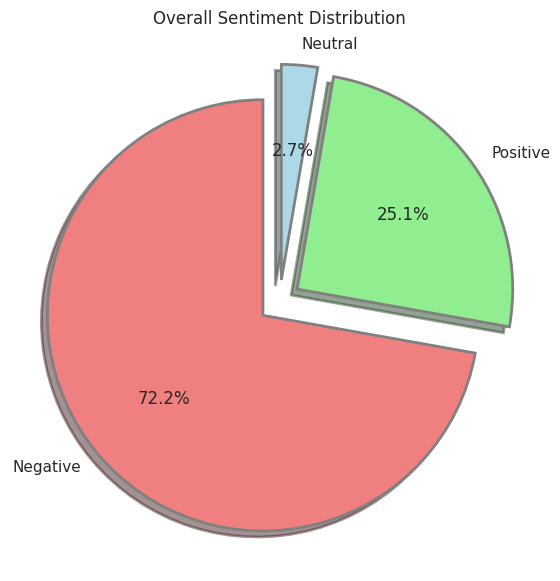

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("lightcoral", "lightgreen", "lightblue")
wp = {'linewidth':2, 'edgecolor':"grey"}
tags = df['sentiment_swn'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Overall Sentiment Distribution')

POSITIVE TWEETS(VADER & SENTIIWORDNET)

In [ ]:
pos_tweets = df[df.sentiment_vader == 'Positive']
pos_tweets = pos_tweets.sort_values(['sentiment_vader'], ascending= False)
pos_tweets[['filtered_text', 'sentiment_vader']]

,filtered_text,sentiment_vader
0,smell scent hand sanitizers today someone past...,Positive
116953,covid instant loan bank employee one month pos...,Positive
116921,covid19 state tracker 811 encourage sign missi...,Positive
116926,regret inform demise nine covid19 positive pat...,Positive
116931,total 32053 covid19 test conduct odisha last 2...,Positive
...,...,...
58786,stay home due covid19 give time spend family c...,Positive
58791,rise spends insurance fuel digital wallet indi...,Positive
58793,please join holy cross prerecord worship sunda...,Positive
58796,originally found 1903 rice street market edmon...,Positive


In [ ]:
pos_tweets = df[df.sentiment_net == 'Positive']
pos_tweets = pos_tweets.sort_values(['sentiment_net'], ascending= False)
pos_tweets[['filtered_text', 'sentiment_net']]

,filtered_text,sentiment_net
0,smell scent hand sanitizers today someone past...,Positive
118233,even middle summer need prepare winter month w...,Positive
118249,big conspiracy theory history covid19,Positive
118247,proud partner worldmaskweek lead health organi...,Positive
118246,prc manipulation un organization real covid19 ...,Positive
...,...,...
59712,guyforgetghost virologist big concern right wo...,Positive
59711,covid19 late dhhsnevada report 50205 case stat...,Positive
59707,sober important read im sorry fantasy jeff gre...,Positive
59705,brief incubig provide overview modernas vaccin...,Positive


NEGATIVE TWEETS(VADER & SENTIIWORDNET)

In [ ]:
neg_tweets = df[df.sentiment_vader == 'Negative']
neg_tweets = neg_tweets.sort_values(['sentiment_vader'], ascending= False)
neg_tweets[['filtered_text', 'sentiment_vader']]

,filtered_text,sentiment_vader
5,coronavirus covid19 death continue rise almost...,Negative
121147,siemens gamesa support morocco fight overcome ...,Negative
121105,singapore airline offer early retirement relea...,Negative
121109,without mitigation strategy one model project ...,Negative
121111,business suffer pandemic look way get back wor...,Negative
...,...,...
60517,another chaotic message govt really dont need ...,Negative
60518,bbc news coronavirus lockdown carer 93 exhaust...,Negative
60522,feel bad friend unlike werent predispose hermi...,Negative
60537,ktvu sad story interest varied impact covid19 ...,Negative


In [ ]:
neg_tweets = df[df.sentiment_net == 'Negative']
neg_tweets = neg_tweets.sort_values(['sentiment_net'], ascending= False)
neg_tweets[['filtered_text', 'sentiment_net']]

,filtered_text,sentiment_net
2,diane3443 wdunlap realdonaldtrump trump never ...,Negative
120137,sir pmoindia fundamental structural reform use...,Negative
120107,final reminder malaysian continue observe sop ...,Negative
120110,realdonaldtrumps watch 169131 american die cov...,Negative
120111,bbchughpym tomwilliams1974 doubt doctor arent ...,Negative
...,...,...
59603,carlwilldurham odd rare exception young people...,Negative
59609,happen tomorrow cro kevin scally chat adam low...,Negative
59610,total u case 4601526 58947 new case total u de...,Negative
59611,planning play bit starwarsbattlefrontii stream...,Negative


NEUTRAL TWEETS(VADER & SENTIIWORDNET)

In [ ]:
neutral_tweets = df[df.sentiment_vader == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['sentiment_vader'], ascending= False)
neutral_tweets[['filtered_text', 'sentiment_vader']]

,filtered_text,sentiment_vader
6,covid19 change work general recruiting specifi...,Neutral
119489,man make virus design shut western economy wor...,Neutral
119458,time go fast year already almost middle august...,Neutral
119459,dogsareloyal1s liebustersleuth covid19 covid19...,Neutral
119464,state health department himachal pradesh repor...,Neutral
...,...,...
59865,pledge 12901 come ryan_andrew23 wa10 waelex co...,Neutral
59876,covid19 vaccine demonic agenda bishop oyedepo ...,Neutral
59887,molecular biologist work towards covid19 vacci...,Neutral
59891,mslongpre second one specifically discuss reso...,Neutral


In [ ]:
neutral_tweets = df[df.sentiment_net == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['sentiment_net'], ascending= False)
neutral_tweets[['filtered_text', 'sentiment_net']]

,filtered_text,sentiment_net
21,coronavirus south africa covid19 update south ...,Neutral
119248,alertacovid19sv san miguel registra 39 nuevos ...,Neutral
119290,vanbadham danielandrewsmp auspol covid19 covid...,Neutral
119297,latestupdate nagalandcovid19updates nagaland c...,Neutral
119308,undp unops unicef islamic development bank gov...,Neutral
...,...,...
59643,spruce king update arena situation clifford ho...,Neutral
59649,believe science standwithfauci liar realdonald...,Neutral
59667,mask ambassador mask influencer covidgreece co...,Neutral
59688,vergonhatvi selectivitat2020 blackpink blackpi...,Neutral


EXPORTING NEW DATASET FOR ML

In [ ]:
df[['filtered_text', 'sentiment_vader', 'sentiment_net']]

,filtered_text,sentiment_vader,sentiment_net,sentiment_swn
0,smell scent hand sanitizers today someone past...,Positive,Positive,Negative
1,hey yankee yankeespr mlb wouldnt make sense pl...,Positive,Positive,Positive
2,diane3443 wdunlap realdonaldtrump trump never ...,Positive,Negative,Negative
3,brookbanktv one gift covid19 give appreciation...,Positive,Positive,Negative
4,25 july medium bulletin novel coronavirusupdat...,Positive,Positive,Negative
...,...,...,...,...
179103,thanks iamohmai nominate wearamask challenge n...,Positive,Positive,Negative
179104,2020 year insanity lol covid19 httpstcoy48np0yzgn,Negative,Negative,Negative
179105,ctvnews powerful painting juan lucena tribute ...,Negative,Positive,Negative
179106,1200 student test positive covid19 major unive...,Positive,Positive,Negative


EXPORTING NEW DATASET FOR ML

In [ ]:
columns_to_save = ['sentiment_vader', 'filtered_text']
selected_columns_df = df[columns_to_save]

# Save the selected columns to a CSV file
selected_columns_df.to_csv('sentiment_vdata.csv', index=False)

In [ ]:
columns_to_save = ['sentiment_net', 'filtered_text']

# Create a new DataFrame with the selected columns
selected_columns_df = df[columns_to_save]

# Save the selected columns to a CSV file
selected_columns_df.to_csv('sentiment_ndata.csv', index=False)

In [ ]:
columns_to_save = ['sentiment_swn', 'filtered_text']

# Create a new DataFrame with the selected columns
selected_columns_df = df[columns_to_save]

# Save the selected columns to a CSV file
selected_columns_df.to_csv('sentiment_sdata.csv', index=False)

In [ ]:
#df_sent = pd.read_csv('sentiment_data.csv')

In [ ]:
#df_sent.head()

In [ ]:
sd1 =pd.read_csv('sentiment_ndata.csv')
sd2 =pd.read_csv('sentiment_vdata.csv')
sd3 =pd.read_csv('sentiment_sdata.csv')

NB MACHINE LEARNING ALGORITHM

MULTINOMIAL NAIVE BAYES MACHINE LEARNING ALGORITHM (SENTIWORDNET)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

senti1 = pd.read_csv('sentiment_ndata.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(senti1['filtered_text'], senti1['sentiment_net'], test_size=0.2, random_state=42)

# Create a TF-IDF representation
vectorizer = TfidfVectorizer(max_features=2000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred)
print("Naive Bayes Report Sentiwordnet:\n", report)

Accuracy: 74.57%
Naive Bayes Report Sentiwordnet:
               precision    recall  f1-score   support

    Negative       0.91      0.46      0.61      8792
     Neutral       0.77      0.02      0.03      2181
    Positive       0.72      0.98      0.83     17495

    accuracy                           0.75     28468
   macro avg       0.80      0.48      0.49     28468
weighted avg       0.78      0.75      0.70     28468



MULTINOMIAL NAIVE BAYES - VADER SENTIMENT

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

vader = pd.read_csv('sentiment_vdata.csv')

X_train, X_test, y_train, y_test = train_test_split(vader['filtered_text'], vader['sentiment_vader'], test_size=0.2, random_state=42)

# Create a TF-IDF representation
vectorizer = TfidfVectorizer(max_features=2000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred)
print("Naive Bayes Report Vader:\n%", report)

Accuracy: 76.26%
Naive Bayes Report Vader:
%               precision    recall  f1-score   support

    Negative       0.80      0.68      0.73      8165
     Neutral       0.80      0.71      0.75      8956
    Positive       0.72      0.86      0.79     11347

    accuracy                           0.76     28468
   macro avg       0.77      0.75      0.76     28468
weighted avg       0.77      0.76      0.76     28468



In [ ]:
print("Naive Bayes Report Sentiwordnet:\n", report)
print("Naive Bayes Report Vader:\n", report)

Naive Bayes Report Sentiwordnet:
               precision    recall  f1-score   support

    Negative       0.77      0.99      0.86     20623
     Neutral       0.18      0.02      0.04       747
    Positive       0.83      0.22      0.34      7098

    accuracy                           0.77     28468
   macro avg       0.59      0.41      0.41     28468
weighted avg       0.77      0.77      0.71     28468

Naive Bayes Report Vader:
               precision    recall  f1-score   support

    Negative       0.77      0.99      0.86     20623
     Neutral       0.18      0.02      0.04       747
    Positive       0.83      0.22      0.34      7098

    accuracy                           0.77     28468
   macro avg       0.59      0.41      0.41     28468
weighted avg       0.77      0.77      0.71     28468

Naive Bayes Report senti2:
               precision    recall  f1-score   support

    Negative       0.77      0.99      0.86     20623
     Neutral       0.18      0.02      0

LOGISTIC REGRESSION (VADER)

In [ ]:
from sklearn.linear_model import LogisticRegression

vader = pd.read_csv('sentiment_vdata.csv')

X_train, X_test, y_train, y_test = train_test_split(vader['filtered_text'], vader['sentiment_vader'], test_size=0.2, random_state=42)

# Create a TF-IDF representation
vectorizer = TfidfVectorizer(max_features=3000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression classifier with increased max_iter
classifier = LogisticRegression(random_state=42, max_iter=2000)
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate classification report with zero_division parameter
report = classification_report(y_test, y_pred, zero_division=1)
print("Logistic Regression Vader Report:\n", report)

Accuracy: 89.75%
Logistic Regression Vader Report:
               precision    recall  f1-score   support

    Negative       0.91      0.82      0.87      8165
     Neutral       0.86      0.96      0.91      8956
    Positive       0.92      0.90      0.91     11347

    accuracy                           0.90     28468
   macro avg       0.90      0.89      0.89     28468
weighted avg       0.90      0.90      0.90     28468



LOGISTIC REGRESSION SENTIWORDNET

In [ ]:
senti1 = pd.read_csv('sentiment_ndata.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(senti1['filtered_text'], senti1['sentiment_net'], test_size=0.2, random_state=42)

# Create a TF-IDF representation
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression classifier with increased max_iter
classifier = LogisticRegression(random_state=42, max_iter=2000)
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate classification report with zero_division parameter
report = classification_report(y_test, y_pred, zero_division=1)
print("Logistic Regression SentiWordNet Report:\n", report)

Accuracy: 88.56%
Logistic Regression SentiWordNet Report:
               precision    recall  f1-score   support

    Negative       0.89      0.86      0.87      8792
     Neutral       0.75      0.37      0.50      2181
    Positive       0.89      0.96      0.93     17495

    accuracy                           0.89     28468
   macro avg       0.84      0.73      0.77     28468
weighted avg       0.88      0.89      0.88     28468



XGBOOST VADER

In [ ]:
from numpy.lib import vander
from xgboost import XGBClassifier

vader = pd.read_csv('sentiment_vdata.csv')

# Convert string labels to numeric values
label_mapping = {'Negative': 1, 'Neutral': 0, 'Positive': 2}
vader['sentiment_vader'] = vader['sentiment_vader'].map(label_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vader['filtered_text'], vader['sentiment_vader'], test_size=0.2, random_state=42)

# Create a TF-IDF representation
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train an XGBoost classifier
classifier = XGBClassifier(random_state=42)
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred)
print("XGBoost Vader Report:\n", report)

Accuracy: 82.91%
XGBoost Vader Report:
               precision    recall  f1-score   support

           0       0.72      0.97      0.83      8956
           1       0.91      0.70      0.79      8165
           2       0.91      0.81      0.86     11347

    accuracy                           0.83     28468
   macro avg       0.85      0.83      0.83     28468
weighted avg       0.85      0.83      0.83     28468



XGBOOST SENTIWORDNET

In [ ]:
from xgboost import XGBClassifier

senti1 = pd.read_csv('sentiment_ndata.csv')

# Convert string labels to numeric values
label_mapping = {'Negative': 1, 'Neutral': 0, 'Positive': 2}
senti1['sentiment_net'] = senti1['sentiment_net'].map(label_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(senti1['filtered_text'], senti1['sentiment_net'], test_size=0.2, random_state=42)

# Create a TF-IDF representation
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train an XGBoost classifier
classifier = XGBClassifier(random_state=42)
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, y_pred)
print("XGBoost SentiWordNet Report:\n", report)

Accuracy: 78.97%
XGBoost SentiWordNet Report:
               precision    recall  f1-score   support

           0       0.80      0.11      0.19      2181
           1       0.91      0.59      0.71      8792
           2       0.76      0.98      0.85     17495

    accuracy                           0.79     28468
   macro avg       0.82      0.56      0.59     28468
weighted avg       0.81      0.79      0.76     28468

